1 0.010746002197265625 0.034603478773584904
2 0.075439453125 0.12048251492628244
4 0.20075225830078125 0.1580170550084074
8 0.5149040222167969 0.20097675007258622
16 1.1083602905273438 0.21439908853638218
[0.2998008728027344, 0.5507049560546875, 1.0696945190429688, 2.0471038818359375, 4.061252593994141]
[0.310546875, 0.6261444091796875, 1.27044677734375, 2.5620079040527344, 5.169612884521484]
1 -0.016216278076171875 -0.04214042844255876
2 0.21368408203125 0.2742910866169493
4 0.6778335571289062 0.4328370570295525
8 1.60174560546875 0.5105182656229863
16 3.502483367919922 0.5493706938074595
[0.401031494140625, 0.5653572082519531, 0.8881912231445312, 1.5357437133789062, 2.8729629516601562]
[0.3848152160644531, 0.7790412902832031, 1.5660247802734375, 3.1374893188476562, 6.375446319580078]


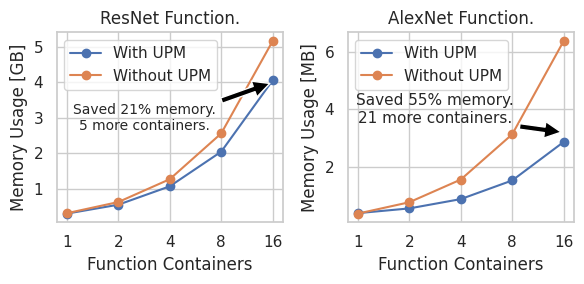

In [1]:
# on einstein vm
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import sys
import os
import json
import numpy as np
import seaborn as sns
#./plot_function_time.py $machine                       
sns.set_style("whitegrid")  
sns.set(rc={'figure.figsize':(6,3)})                             
sns.set_style("whitegrid")  

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig, ax = plt.subplots(nrows=1, ncols=2)

x = [1, 2, 3, 4, 5]
x_axis = [1, 2, 4, 8, 16]
# source is the file: einstein_vm/memory_usage/411.image-recognition/function_memory/dedup_on/system_memory_usage.txt
# column 'used'
used_memory_usm=[488848, 803212, 1066304, 1610504, 2635392, 4747380]  # fill in the this manually
memory_usage_usm = []

# source is the file: einstein_vm/memory_usage/411.image-recognition/function_memory/dedup_off/system_memory_usage.txt
# column 'used'
used_memory_nousm = [515536,841168,1172096,1847696,3201996,5936268]  # fill in this
memory_usage_nousm = []

#print((used_memory_nousm - used_memory_usm))

for i in range(1, 6):
    memory_usage_usm.append((used_memory_usm[i] - used_memory_usm[0]) / 1024/1024.0)
    memory_usage_nousm.append((used_memory_nousm[i] - used_memory_nousm[0]) / 1024/1024.0)
    print(x_axis[i-1], memory_usage_nousm[i-1] - memory_usage_usm[i-1], (memory_usage_nousm[i-1] - memory_usage_usm[i-1])/memory_usage_nousm[i-1])

print(memory_usage_usm)
print(memory_usage_nousm)
ax[0].set_xticks(x, x_axis)

ax[0].plot(x, memory_usage_usm, 'o-', label="With UPM")

ax[0].plot(x, memory_usage_nousm, 'o-', label="Without UPM")

ax[0].annotate('Saved 21% memory.\n5 more containers.', xy=(5,4), xytext=(2.5, 3),fontsize=10,#fontweight='bold',\n",
            ha="center", va="center",
            arrowprops=dict(facecolor='black', shrink=0.05),
)

#plt.grid(axis='y')
#plt.title("System M")
ax[0].set_title('ResNet Function.')
ax[0].set_xlabel('Function Containers')
ax[0].set_ylabel('Memory Usage [GB]')
plt.rcParams['figure.dpi'] = 300
# plt.ylim(ymin=0)
ax[0].legend()
plt.tight_layout()
# plt.savefig(os.path.join(usm_data_dir, machine, "pictures", 'function_time.jpg'))


x = [1, 2, 3, 4, 5]
x_axis = [1, 2, 4, 8, 16]

# source is the file: einstein_vm/memory_usage/recognition-alexnet/function_memory/dedup_on/system_memory_usage.txt
# column 'used'
used_memory_usm=[392824,813336,985644,1324160,2003168,3405344]  # fill in the this manually
memory_usage_usm = []

# source is the file: einstein_vm/memory_usage/recognition-alexnet/function_memory/dedup_off/system_memory_usage.txt
# column 'used'
used_memory_nousm = [492220,895728,1309104,2134316,3782116,7177360]  # fill in this
memory_usage_nousm = []

#print((used_memory_nousm - used_memory_usm))

for i in range(1, 6):
    memory_usage_usm.append((used_memory_usm[i] - used_memory_usm[0]) / 1024/1024.0)
    memory_usage_nousm.append((used_memory_nousm[i] - used_memory_nousm[0]) / 1024/1024.0)
    print(x_axis[i-1], memory_usage_nousm[i-1] - memory_usage_usm[i-1], (memory_usage_nousm[i-1] - memory_usage_usm[i-1])/memory_usage_nousm[i-1])

print(memory_usage_usm)
print(memory_usage_nousm)
ax[1].set_xticks(x, x_axis)

ax[1].plot(x, memory_usage_usm, 'o-', label="With UPM")

ax[1].plot(x, memory_usage_nousm, 'o-', label="Without UPM")


ax[1].annotate('Saved 55% memory.\n21 more containers.', xy=(5,3.2), xytext=(2.5, 4),fontsize=11,#fontweight='bold',\n",
            ha="center", va="center",
            arrowprops=dict(facecolor='black', shrink=0.05),
)


#plt.grid(axis='y')
#plt.title("System M")
ax[1].set_title('AlexNet Function.')
ax[1].set_xlabel('Function Containers')
ax[1].set_ylabel('Memory Usage [MB]')
#ax[1].rcParams['figure.dpi'] = 300
# plt.ylim(ymin=0)
ax[1].legend()
plt.tight_layout()
machine="einstein_vm"
plt.savefig(os.path.join("..", machine, "plots", 'memory_system.pdf'))